In [10]:
import matplotlib
matplotlib.use('TKAgg')
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib.animation as animation
import time
from scipy.stats import bootstrap
rng = np.random.default_rng()

In [11]:
class Ising_Model():
    def __init__(self, N, T, J=1):
        """
        N = lattice size, T = Temperature
        to initialise 
        """
        self.N = N
        self.J = J
        self.spins = 2 * np.random.randint(2,size=(N,N)) -1
        #self.spins = np.ones((self.N,self.N))
        self.T = T
        self.M = self.magnetisation()
        self.E = self.energy()
        
    
    def metropolis(self, delta, index):
        p = np.exp(-delta/self.T)
        rand = np.random.random()
        if p > rand:
            self.spins[index[0], index[1]] = -1*self.spins[index[0], index[1]]
            

    
    def glauber(self):
        N = self.N
        val = ((np.random.random((1,2))[0])*N).astype(int)
        delta = 2*self.spins[val[0],val[1]]*((self.spins[(val[0]+1)%N, val[1]] + self.spins[(val[0]-1)%N, val[1]]  + self.spins[val[0], (val[1]-1)%N]+ self.spins[val[0], (val[1]+1)%N]))
        self.metropolis(delta, val)
    
    def animateglauber(self, nstep):

            
        fig = plt.figure()
        im = plt.imshow(self.spins, animated=True)
        for n in range(nstep):
            f=open('spins.dat','w')
            for i in range(self.N):
                for j in range(self.N):
                    self.glauber()
                    f.write('%d %d %lf\n'%(i,j,self.spins[i,j]))
            f.close()
        #       show animation
            plt.cla()
            im=plt.imshow(self.spins, animated=True)
            plt.draw()
            plt.pause(0.0001)
            
    def kawasaki(self):
        N = self.N
        index1 = ((np.random.random((1,2))[0])*N).astype(int)
        index2 = ((np.random.random((1,2))[0])*N).astype(int)
        delta = 0
        if self.spins[index1[0],index1[1]] != self.spins[index2[0],index2[1]]: 
            delta1 = 2*self.spins[index1[0],index1[1]]*((self.spins[(index1[0]+1)%N, index1[1]] + self.spins[(index1[0]-1)%N, index1[1]]  + self.spins[index1[0], (index1[1]-1)%N]+ self.spins[index1[0], (index1[1]+1)%N]))
            delta2 = 2*self.spins[index2[0],index2[1]]*((self.spins[(index2[0]+1)%N, index2[1]] + self.spins[(index2[0]-1)%N, index2[1]]  + self.spins[index2[0], (index2[1]-1)%N]+ self.spins[index2[0], (index2[1]+1)%N]))
            delta = -(delta1 + delta2)
            #print(delta)
            if abs((index1[0] + index1[1]) - (index2[0] + index2[1])) == 1:
                delta += 4
        p = np.exp(-delta/self.T)
        rand = np.random.random()
        if p < rand:
            self.spins[index1[0], index1[1]] = -1*self.spins[index1[0], index1[1]]
            self.spins[index2[0], index2[1]] = -1*self.spins[index2[0], index2[1]]
        
   
    def animatekawasaki(self, nstep):
        
        sweep = (self.N)**2
        nsweep = nstep/sweep
        fig = plt.figure()
        im = plt.imshow(self.spins, animated=True)
        for n in range(nstep):
            
            f=open('spins.dat','w')
            for i in range(self.N):
                for j in range(self.N):
                    self.kawasaki()
                    f.write('%d %d %lf\n'%(i,j,self.spins[i,j]))
            f.close()
        #       show animation
            plt.cla()
            im=plt.imshow(self.spins, animated=True)
            plt.draw()
            plt.pause(0.0001)
            
           
                
   
    def magnetisation(self):
        
        M = 0
        for i in range(self.N):
            for j in range(self.N):
                M += self.spins[i,j]
    
        #print(m)
        return abs(M)
    
    def measurements(self, sweeprange, method):
        
        sweepval = (self.N)**2
        #nsweep = sweeprange/sweepval
        m = []
        msquare = []
        energ = []
        esquare = []
        if method == 'g':
            t1 = time.time()
            for n in range(sweeprange):
                for i in range(self.N):
                    for j in range(self.N):
                        self.glauber()
                if n >= 100 and n%10 == 0:
                    
                        m.append(self.magnetisation())
                        #msquare.append(self.magnetisation()**2)
                        energ.append(self.energy())
                        #esquare.append(self.energy()**2)
                #if n%1000 ==0:
                    #print('this is working dw')
                        
            #print(m)
            M = np.array(m)
            #MS = np.mean(np.array(msquare))
            E = np.array(energ)
            #ES = np.mean(np.array(esquare))
            return M, E
        
        if method == 'k':
            #MAKE SURE KAWASAKI WORKS
            for n in range(sweeprange):
                for i in range(self.N):
                    for j in range(self.N):
                        self.kawasaki()
                if n >= 100 and n%10 == 0:
                    
                    energ.append(self.energy())
                    #esquare.append(self.energy()**2)
            E = np.array(energ)
            Mavg = 0
            Msavg = 0
                        
            return Mavg, E           
            
    
    def energy(self):
        Energy = 0
        #print('hello')
        #N = self.N
        for i in range(self.N):
            for j in range(self.N):
                S = self.spins[i,j]
                temp = self.spins[(i+1)%self.N, j] + self.spins[(i-1)%self.N, j] + self.spins[i, (j+1)%self.N] + self.spins[i, (j-1)%self.N]
                Energy += -S*temp/2
                #print(Energy)
        #print(Energy)
        return Energy
                
        
            
    def plotmag(self, method):
        temperatures = []
        mags = []
        magsquare = []
        ens = []
        ensquare = []
        for t in range(15):
            Temp = 1.5 + t/10
            X = Ising_Model(25, Temp)
            m, e = X.measurements(10000, method)
            temperatures.append(Temp)
            mags.append(m)
            ens.append(e)
            print(t)
        #susc = (np.mean(np.array(mags)**2) - np.mean(np.array(mags))**2)/(self.N*Temp)
        #Ch = (np.mean(np.array(ens)**2) - np.mean(np.array(ens))**2)/(self.N*Temp**2)
        temp = np.array(temperatures)
        susc = variance(np.array(mags))/(self.N*temp)
        Ch = variance(np.array(ens))/(self.N*temp**2)
        #res = bootstrap
        #plt.plot(temperatures, susc)
        #plt.show
        #plt.plot(temperatures, Ch)
        #plt.show
        return np.array(temperatures), mags, ens, susc, Ch
    
    
            
def mean(values):
    means = []
    for i in values:
        means.append(np.mean(i))
    return np.array(means)
    
def variance(values):
    result = []
    for i in values:
        res = (np.mean(np.square(i)) - np.square(np.mean(i)))
        result.append(res)
    return np.array(result)

def bootstrap(data,t):
        chvals = []
        for i in range(500):
            sample = (20*np.random.random(len(data))).astype(int)
            temps = []
            vals = []
            for j in sample:
                vals.append(data[j])
                temps.append(t[j]**2)
            #print(np.array(vals))
            #print(variance(np.array(vals))/(X.N*np.array(temps)**2))
            
            chvals.append(np.mean((variance(np.array(vals)))/(X.N*np.array(temps))))
        #print(chvals)
        
        error = np.sqrt(np.mean(np.square(np.array(chvals))) - np.square(np.mean(np.array(chvals))))
        return error

#def shitvariance(value):
    
    
        
    
    
        
            
            
    
        
        
    
                
                
        
        

Animate Glauber

In [12]:
X = Ising_Model(50, 1)
X.animateglauber(1000)

KeyboardInterrupt: 

Animate Kawasaki

In [8]:
X.animatekawasaki(500)

KeyboardInterrupt: 

# Observables

Run Ising Model and get glauber results
t = temperatures, m = magnetisations (not mean) e = energy (not mean), s = susceptibility, ch = heat capacity 

In [9]:
X = Ising_Model(25, 1)
#X.animateglauber(500)
#X.animatekawasaki(1000)
#X.measurements(10000,'g')
t, m, e, s, ch = X.plotmag('g')

KeyboardInterrupt: 

In [251]:
#X.animateglauber(20000)

kawasaki results:

In [ ]:
tk, mk, ek, sk, chk = X.plotmag('k')

Text(0.5, 0, 'T (k)')

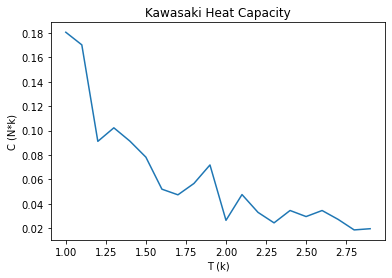

In [249]:
plt.plot(tk, chk)
#plt.errorbar(t, s, xerr=None, yerr=bootstrap(ek,t))
plt.title('Kawasaki Heat Capacity')
plt.ylabel('C (N*k)')
plt.xlabel('T (k)')

<function matplotlib.pyplot.show(close=None, block=None)>

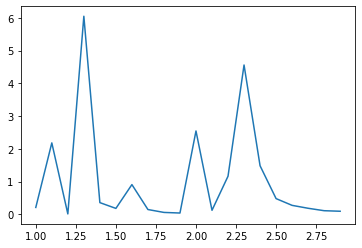

Text(0.5, 1.0, 'Glauber Heat Capacity')

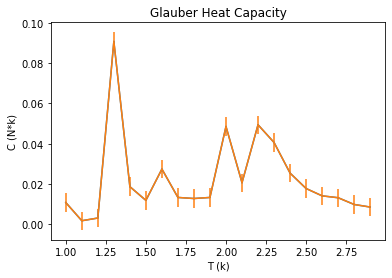

In [239]:
plt.plot(t, ch)
plt.errorbar(t, ch, xerr=None, yerr=bootstrap(e,t))
plt.xlabel('T (k)')
plt.ylabel('C (N*k)')
plt.title('Glauber Heat Capacity')

<ErrorbarContainer object of 3 artists>

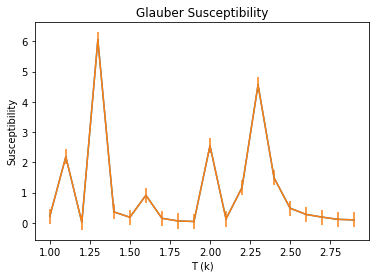

In [240]:
plt.plot(t, s)
plt.title('Glauber Susceptibility')
plt.xlabel('T (k)')
plt.ylabel('Susceptibility')
plt.errorbar(t, s, xerr=None, yerr=bootstrap(m,t))

In [ ]:
plt.plot(t, mean(e))
print(mean(e))
plt.title('Glauber Total Energy vs Temperature')

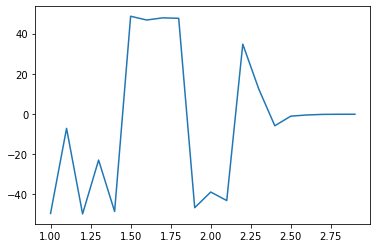

In [245]:
plt.plot(t, mean(m))
plt.title('Glauber Magnetisation vs Temperature')

In [130]:
print(ch)

[0.00067088 0.00150775 0.00270539 0.00519638 0.00788069 0.01220794
 0.02131242 0.02773437 0.03872296 0.0564276  0.08758326 0.09668202
 0.15869437 0.16070735 0.18462199 0.19223164 0.15886429 0.14664056
 0.13157526 0.11536698]


In [148]:
x = bootstrap(e, t)
#plt.plot(t, susc)

(500,)


In [275]:
Y = Ising_Model(50,1)
print(Y.energy())

hello
hello
-5000.0


In [215]:
tempfile = open("temp.txt", "a")
tempfile.write(str(t))
tempfile.close
tempfile = open("temp.txt", "r")
#print(tempfile.read())

magfile = open("mag.txt", "a")
magfile.write(str(m))
magfile.close
magfile = open("mag.txt", "r")
print(magfile.read())

susfile = open("sus.txt", "a")
susfile.write(str(s))
susfile.close
susfile = open("sus.txt", "r")
print(susfile.read())

enfile = open("en.txt", "a")
enfile.write(str(e))
enfile.close
enfile = open("en.txt", "r")
print(enfile.read())

chfile = open("ch.txt", "a")
chfile.write(str(ch))
chfile.close
chfile = open("ch.txt", "r")
print(chfile.read())

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9]
[array([-16.24, -15.96, -18.64, -19.12, -20.24, -21.16, -23.08, -25.64,
       -25.52, -27.36, -27.44, -28.68, -31.64, -33.24, -34.8 , -36.32,
       -38.32, -40.04, -41.32, -43.44, -45.16, -47.76, -48.76, -50.  ,
       -49.92, -49.96, -49.96, -50.  , -49.96, -50.  , -49.96, -50.  ,
       -49.96, -50.  , -49.96, -50.  , -50.  , -49.96, -49.96, -49.96,
       -50.  , -50.  , -50.  , -49.96, -50.  , -50.  , -49.96, -49.92,
       -49.96, -49.96, -49.96, -50.  , -49.92, -49.96, -49.88, -49.96,
       -49.96, -49.96, -50.  , -49.96, -49.96, -49.96, -49.92, -49.96,
       -49.96, -50.  , -49.96, -50.  , -50.  , -50.  , -49.96, -49.96,
       -50.  , -49.84, -49.92, -49.92, -49.96, -50.  , -49.96, -49.88,
       -50.  , -49.96, -49.92, -49.88, -50.  , -49.96, -49.96, -49.92,
       -50.  , -49.96, -49.96, -49.96, -49.96, -49.96, -49.96, -49.96,
       -50.  , -49.96, -49.88, -49.88, -50.  , -50.  , -49.96, -

ConfidenceInterval(low=3.7062922143707406, high=4.720669130359754)
